In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [5]:
f = lambda x1, x2: 0.2*np.log(x1) + 0.4*np.log(x2)
g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)
g2 = lambda x1, x2: 1*(x2+0.35*np.log(x1)-2*x1**2+0.6>0)
g3 = lambda x1, x2: 1*(-x2+1.1*x1+0.4>0)
g4 = lambda x1, x2: 1*(-x2-1.5*x1+2.6>0)

g = lambda x1, x2: g1(x1,x2)*g2(x1,x2)*g3(x1,x2)*g4(x1,x2)
g34 = lambda x1, x2: g3(x1,x2)*g4(x1,x2)

In [6]:
def cmap_gen(color):
    return LinearSegmentedColormap.from_list('foo', ['w',color], 2)
    
def draw_contour(func, x1_lim, x2_lim, cm=None, N = 1000, ax=None, fig=None, contour=False, lname='', **kwargs):
    
    if cm is None:
        cm = LinearSegmentedColormap.from_list('foo', ['w','tab:orange'], 2)
        
    if ax is None and fig is None:
        fig = plt.figure()
        ax = fig.add_subplot()

    x1 = np.linspace(x1_lim[0],x1_lim[1], N)
    x2 = np.linspace(x2_lim[0],x2_lim[1], N)

    x1m, x2m = np.meshgrid(x1, x2)
    
    z = func(x1m, x2m)
    
    if contour:
        cntr = ax.contour(x1,x2,z,cmap=cm, **kwargs)
    else:
        cntr = ax.contourf(x1,x2,z,cmap=cm,alpha=0.2, **kwargs)
        
    return fig, ax, cntr

def draw_contour_from_df(dfl, x1_lim, x2_lim, cm=None, ax=None, fig=None, contour=False, lname='', **kwargs):
    if cm is None:
        cm = LinearSegmentedColormap.from_list('foo', ['w','tab:orange'], 2)
        
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot()
    
    x1,x2,y = dfl['x[1]'].to_numpy(),dfl['x[2]'].to_numpy(), dfl['Y'].to_numpy() 
    
    x1 = x1.reshape((np.sqrt(x1.shape[0]).astype(np.int32), -1)).T
    x2 = x2.reshape((np.sqrt(x2.shape[0]).astype(np.int32), -1)).T
    y = y.reshape((np.sqrt(y.shape[0]).astype(np.int32), -1)).T

    
    
    if contour:
        cntr = ax.contour(x1, x2, y, cmap=cm, **kwargs)
    else:
        cntr = ax.contourf(x1, x2, y, cmap=cm, alpha=0.2, **kwargs)
    
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_xlim(x1_lim)
    ax.set_ylim(x2_lim)
    return fig, ax, cntr

def draw_scatter(df, x, y, label, color_map=None, ax=None, fig=None):
    
    ax.autoscale(False)
    
    for val in df[label].unique():
        df_sub = df[df[label] == val]
        xx, yy = df_sub[x].to_numpy(), df_sub[y].to_numpy()
        ax.scatter(xx, yy, label=val, edgecolors='white', marker='o', s=60)

def full_draw_constraint(df, func, x1_lim, x2_lim, ax=None, fig=None):
    cm = LinearSegmentedColormap.from_list('foo', ['w','tab:orange'], 2)

    fig, ax, _ = draw_contour(func, x1_lim, x2_lim, cm, fig=fig, ax=ax)
    draw_scatter(df, 'x[1]', 'x[2]', 'feasible', fig=fig, ax=ax)

    ax.legend(loc='lower right')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    return fig, ax

In [114]:
x1_lim = (0.51, 3)
x2_lim = (0.3, 3)#(0.01, 3)

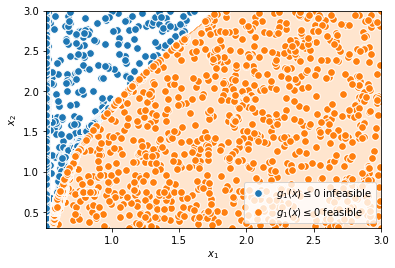

In [115]:
i = 2

df = pd.read_csv(f'./oct_sampling/main_{i}.csv')
#dfl = pd.read_csv(f'./lnr_{i}.csv')
df['feasible'] = df['Y'].apply(lambda x: '$g_1(x)\leq 0$ feasible' if x>0 else '$g_1(x)\leq 0$ infeasible')

#sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='feasible')
fig, ax = full_draw_constraint(df, g1, x1_lim, x2_lim)

In [116]:
def random_turn_off_positives(mask, ratio=0.3):
    tmp_mask = mask[mask]
    smpl = tmp_mask.sample(int(ratio*tmp_mask.shape[0])).index
    
    mask[smpl] = False
    
    return mask
    

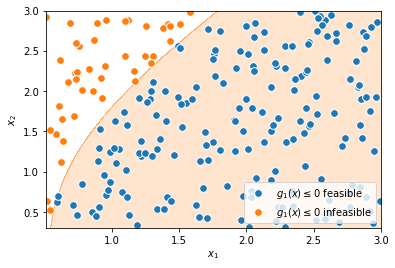

In [126]:
m1 = random_turn_off_positives(df['s_label'].isin(['lh_sample']), ratio=0.8)

fig, ax = full_draw_constraint(df[m1], g1, x1_lim, x2_lim)

plt.savefig("oct_sampling/a1.svg", format='svg')

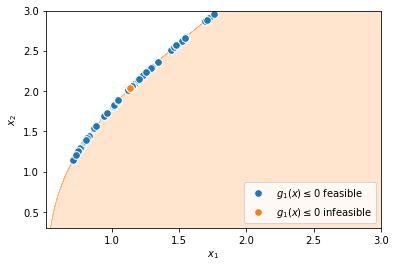

In [127]:
m2 = random_turn_off_positives(df['s_label'].isin(['knn']), ratio=0.3)

fig, ax = full_draw_constraint(df[m2], g1, x1_lim, x2_lim)

plt.savefig("oct_sampling/a2.svg", format='svg')

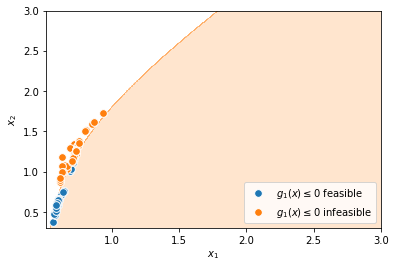

In [130]:
m3 = random_turn_off_positives(df['s_label'].isin(['oct']), ratio=0.965)

fig, ax = full_draw_constraint(df[m3], g1, x1_lim, x2_lim)

plt.savefig("oct_sampling/a3.svg", format='svg')

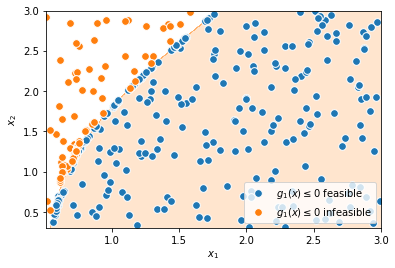

In [131]:
fig, ax = full_draw_constraint(df[m1 | m2 | m3], g1, x1_lim, x2_lim)

plt.savefig("oct_sampling/a4.svg", format='svg')

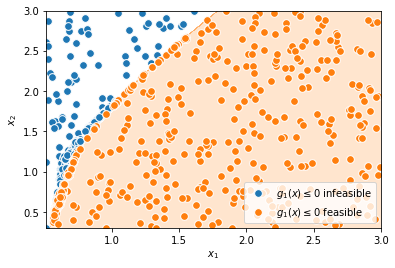

In [121]:
fig, ax = full_draw_constraint(df[df['s_label'].isin(['lh_sample', 'oct', 'knn'])].sample(1000), g1, x1_lim, x2_lim)

In [10]:
df[df['s_label'] == 'oct']

,x[1],x[2],Y,id,s_label,lb_x[2],ub_x[2],lb_x[1],ub_x[1],feasible
3495,1.307511,2.315425,0.000153,3496,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ feasible
3496,0.716428,1.151484,0.006830,3497,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ feasible
3497,0.719508,1.153022,0.014447,3498,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ feasible
3498,0.719199,1.152736,0.013821,3499,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ feasible
3499,0.720744,1.152975,0.018147,3500,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ feasible
...,...,...,...,...,...,...,...,...,...,...
5235,0.978281,1.797309,-0.036178,5236,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ infeasible
5236,0.979213,1.797464,-0.034563,5237,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ infeasible
5237,0.979287,1.798790,-0.035748,5238,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ infeasible
5238,0.982558,1.800107,-0.030870,5239,oct,0.3,3.0,0.51,3.0,$g_1(x)\leq 0$ infeasible


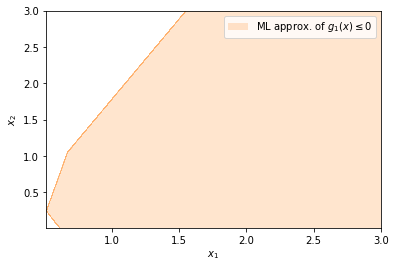

In [491]:
#fig, ax = draw_contour(g1, x1_lim, x2_lim, cm)
#draw_contour_from_df(dfl, x1_lim, x2_lim, ax=ax, fig=fig, cm=cmap_gen('tab:blue'))
fig, ax, cnt = draw_contour_from_df(dfl, x1_lim, x2_lim, cm=cmap_gen('tab:orange'))
ax.legend([cnt.legend_elements()[0][-1]], ['ML approx. of $g_1(x)\leq 0$'])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x_1$', ylabel='$x_2$'>)

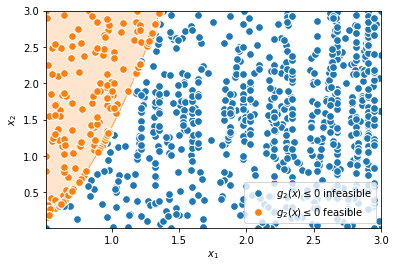

In [492]:
i = 3

df = pd.read_csv(f'./main_{i}.csv')
df['feasible'] = df['Y'].apply(lambda x: '$g_2(x)\leq 0$ feasible' if x>0 else '$g_2(x)\leq 0$ infeasible')
dfl = pd.read_csv(f'./lnr_{i}.csv')

#sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='feasible')
full_draw_constraint(df, g2, x1_lim, x2_lim)

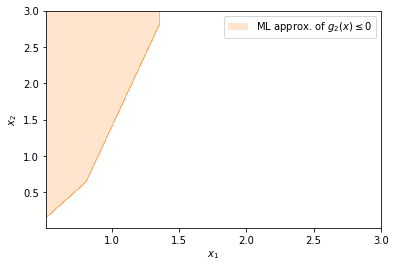

In [493]:
fig, ax, cnt = draw_contour_from_df(dfl, x1_lim, x2_lim)
ax.legend([cnt.legend_elements()[0][-1]], ['ML approx. of $g_2(x)\leq 0$'])

In [487]:
x, y, z = df['x[1]'].to_numpy(), df['x[2]'].to_numpy(), df['feasible'].to_numpy()

#plt.tricontourf(x, y, z, levels=[0, 1])
#sns.displot(data=df, x='x[1]', y='x[2]', hue='feasible',binwidth=0.2)

# Correct and approximation

In [495]:
x1_lim = (0.45, 1.5)
x2_lim = (0, 1.5)

In [496]:
df2 = pd.read_csv(f'./lnr_{2}.csv')
df3 = pd.read_csv(f'./lnr_{3}.csv')

In [497]:
df2['Y'] = df2['Y']*df3['Y']
df2['Y'] = df2['Y']*g34(df2['x[1]'].to_numpy(), df2['x[2]'].to_numpy())

C:\Users\marga\AppData\Local\Temp/ipykernel_37892/2614218318.py:2: RuntimeWarning: invalid value encountered in log
  g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)


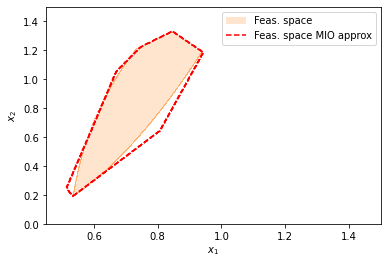

In [498]:
fig, ax, cnt1 = draw_contour(g, x1_lim, x2_lim,  cm=cmap_gen('tab:orange'))
_,_,cnt2 = draw_contour_from_df(df2, x1_lim, x2_lim, cm=cmap_gen('red'), fig=fig, ax=ax, 
                                contour=True, linestyles='dashed')

h1,_ = cnt.legend_elements()
h2,_ = cnt2.legend_elements()

ax.legend([h1[-1], h2[-1]], ['Feas. space', 'Feas. space MIO approx.'])

# Solution path

In [472]:
df_p = pd.read_csv('solution_history.csv')
x1p, x2p = df_p['x[1]'].to_numpy(), df_p['x[2]'].to_numpy()

In [469]:
N = 1000

x1_lim = (0.45, 1)
x2_lim = (0, 1.5)

x1 = np.linspace(x1_lim[0],x1_lim[1], N)
x2 = np.linspace(x2_lim[0],x2_lim[1], N)

x1m, x2m = np.meshgrid(x1, x2)
z = g(x1m, x2m)


C:\Users\marga\AppData\Local\Temp/ipykernel_37892/2614218318.py:2: RuntimeWarning: invalid value encountered in log
  g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)


(0.16783014885289346, 0.3337093333248049)

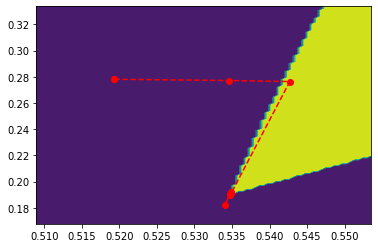

In [470]:
# Create a figure
fig = plt.figure()
ax = fig.add_subplot()

plt.contourf(x1,x2,z)
#plt.scatter(x, y)
plt.plot(x1p, x2p, 'ro', linestyle="--")

# ax.set_xlim(x1_lim)
# ax.set_ylim(x2_lim)

# ax.set_xlim((0.5,0.55))
# ax.set_ylim((0,0.4))

ax.set_xlim((x1p.min()*0.98,x1p.max()*1.02))
ax.set_ylim((x2p.min()*0.92,x2p.max()*1.2))

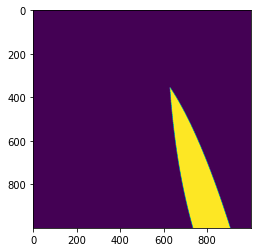

In [28]:
plt.imshow(z)

In [ ]:
ax.matshow(intersection_matrix, cmap=plt.cm.Blues)

C:\Users\marga\AppData\Local\Temp/ipykernel_37892/2614218318.py:2: RuntimeWarning: invalid value encountered in log
  g1 = lambda x1, x2: 1*(0.43*np.log(x1-0.5)+1.1+x1-x2>0)


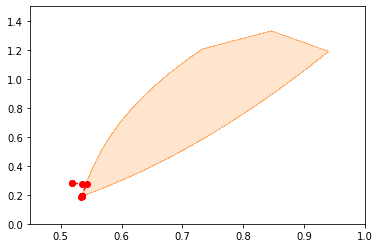

In [502]:
x1_lim = (0.45, 1)
x2_lim = (0, 1.5)

# x1_lim = (x1p.min()*0.95,x1p.max()*1.1)
# x2_lim = (x2p.min()*0.92,x2p.max()*1.2)

fig, ax, cnt1 = draw_contour(g, x1_lim, x2_lim,  cm=cmap_gen('tab:orange'))
ax.plot(x1p, x2p, 'ro', linestyle="--")

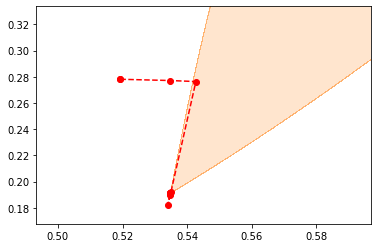

In [501]:
fig
